<a href="https://colab.research.google.com/github/jijan67/Crop-Recommendation-NaiveBayes/blob/main/Crop_Recommendation_Using_Machine_Learning_Model_(GNB)_with_99_55_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')


In [ ]:
# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
class_labels = le.classes_

In [ ]:
# Split data into train and test sets
x = df.drop('label', axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)


In [ ]:
# Initialize Gaussian Naive Bayes model
gnb_model = GaussianNB()


In [ ]:
# Train the model
gnb_model.fit(x_train, y_train)


GaussianNB()

In [ ]:
# Save the trained model
with open('gnb_model.pickle', 'wb') as file:
    pickle.dump(gnb_model, file)

In [ ]:
# Get predicted labels
y_pred = gnb_model.predict(x_test)


In [ ]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(test_accuracy))


Accuracy: 0.9955


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        10
      banana       1.00      1.00      1.00         9
   blackgram       1.00      1.00      1.00        11
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        10
      coffee       1.00      1.00      1.00        11
      cotton       1.00      1.00      1.00        12
      grapes       1.00      1.00      1.00         9
        jute       1.00      0.90      0.95        10
 kidneybeans       1.00      1.00      1.00        10
      lentil       1.00      1.00      1.00         7
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        12
   mothbeans       1.00      1.00      1.00         5
    mungbean       1.00      1.00      1.00        11
   muskmelon       1.00      1.00      1.00        11
      orange       1.00      1.00      1.00         8
    

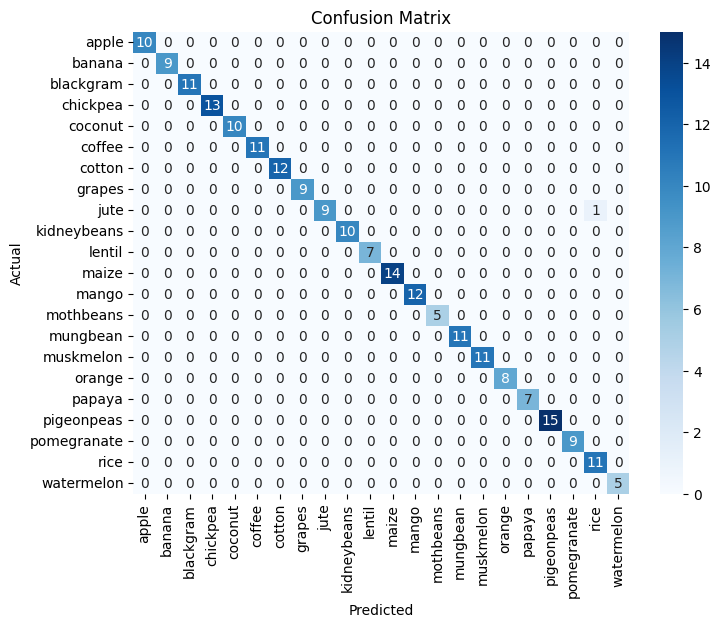

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Prediction
# Create a test series with sample input data
test_series = pd.Series({
    'N': 90,
    'P': 42,
    'K': 43,
    'temperature': 25,
    'humidity': 86,
    'ph': 6.5,
    'rainfall': 220
})

In [ ]:
# Use the trained model to predict the recommended crop
output = gnb_model.predict([test_series])[0]
print("Recommended Crop:", class_labels[output])

Recommended Crop: rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
